## **Marcos Damián Pool Canul** | `200300591@ucaribe.edu.mx`

### Actividad #3 - PCA Analisis de Componentes

### Profesora: *Yarely Baez Lopez*

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Introducción

Una opción para reducir la dimensionalidad de un conjunto de datos (número de variables) es el **análisis de componentes principales**. Con esta técnica se definen nuevas variables, transformando linealmente a las variables originales.

Geométricamente, las nuevas variables representan **rotaciones de las variables originales**. Las nuevas variables tienen una característica: los ejes transformados se alinean en la dirección en la que los datos tienen la mayor variabilidad.



### Maximización de la varianza

Buscamos, además, elegir las direcciones de los nuevos ejes de manera que la varianza proyectada sobre ellos se maximice

## Cálculo de los componentes principales

El cálculo de los componentes principales de un conjunto de datos se realiza a partir de su matriz de covarianza.

### Matriz de covarianza

La matriz de covarianza contiene **toda** la información de los datos originales:

$$C = (X-\mu_X)^{T}(X-\mu_X)/(N-1)$$



# Datos de exámenes [ejemplo]

Considera el siguiente conjunto de datos en el que se han registrado las calificaciones de algunos estudiantes, correspondientes a 4 exámenes diferentes:




In [55]:
df = pd.read_csv("./files/examen_data.csv")
df.head()

,mat,fis,esp,lec
0,987.293813,979.823870,1018.481276,1023.073783
1,986.302222,1001.704575,982.546053,984.426305
2,971.015410,972.496385,1035.605273,1031.472877
3,1031.318324,1015.896592,1005.115753,1002.394719
4,1002.335095,1031.289476,1011.179274,1018.275839


<AxesSubplot: >

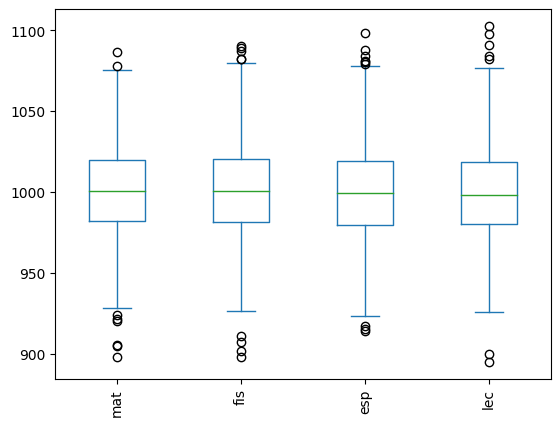

In [56]:
df.plot.box(rot=90)

Algunas calificaciones están altamente correlacionadas:

In [57]:
df.corr()

,mat,fis,esp,lec
mat,1.000000,0.734075,0.089887,0.156072
fis,0.734075,1.000000,0.108087,0.088035
esp,0.089887,0.108087,1.000000,0.810370
lec,0.156072,0.088035,0.810370,1.000000


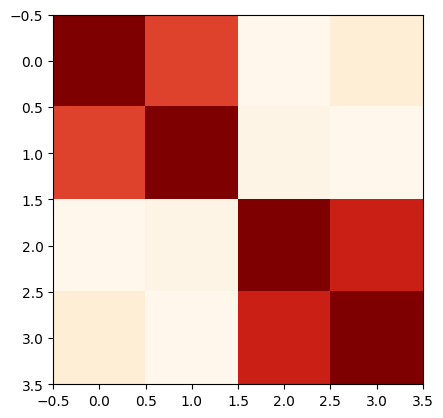

In [58]:
plt.imshow(df.corr(), cmap='OrRd', interpolation='nearest')
plt.show()

Entendemos que la calificación de matemáticas nos brinda información sobre la de física, mientras que conocer la calificación de español nos ayuda a inferir la de comprensión lectora.

Intuitivamente, si quisiéramos realziar algún estudio estadístico cone staos datos, podríamos pensar en **basarnos solo en dos de las 4 variables**.

Exploremos la aplicación de la técnica de Análisis de Componentes Principales sobre este conjunto de datos:

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4) # inicialmente, utilizamos todas las variables
pca_calif = pca.fit(df)

Vectores propios (las 4 filas de la siguiente matriz):



In [60]:
pca_calif.components_

array([[ 0.4798601 ,  0.47775798,  0.52746336,  0.51309259],
       [-0.5047958 , -0.53543249,  0.49930473,  0.45737078],
       [ 0.65465747, -0.64363792, -0.28281531,  0.27779366],
       [ 0.29383512, -0.26606311,  0.62649237, -0.67110256]])

¿Cuánta varianza explican?

In [61]:
pca_calif.explained_variance_ratio_*100 #las componentes se ordenan de acuerdo a la variana explicada

array([49.81337571, 38.8063507 ,  7.17811647,  4.20215713])

In [62]:
np.cumsum(pca_calif.explained_variance_ratio_)*100

array([ 49.81337571,  88.61972641,  95.79784287, 100.        ])

Con dos componentes se explica el $88\%$ de la varianza de los datos originales. **Proyectemos entonces los datos a las dos componentes principales:**

In [63]:
df_p = pca.transform(df)[:,:2] #seleccionemos las dos primeras columnas solamente
df_p[:10,:] # los datos transformados se representan con dos variables (pero explican casi el 90% de la información original)

array([[  6.12616114,  37.79539654],
       [-22.68023053,  -9.03854698],
       [  8.15583473,  62.32763227],
       [ 26.82569974, -19.8739677 ],
       [ 31.61864796,  -3.19410063],
       [-38.666896  , -31.69594702],
       [-39.56287346,  31.72149987],
       [-10.35553231,  -4.00543111],
       [-39.74006911, -32.57822641],
       [ -2.22677513,  16.98616048]])

Para contrastar, las primeras 10 filas de los datos originales.

In [64]:
df.values[:10,:]

array([[ 987.2938132,  979.82387  , 1018.481276 , 1023.073783 ],
       [ 986.3022222, 1001.704575 ,  982.5460532,  984.4263046],
       [ 971.01541  ,  972.4963855, 1035.605273 , 1031.472877 ],
       [1031.318324 , 1015.896592 , 1005.115753 , 1002.394719 ],
       [1002.335095 , 1031.289476 , 1011.179274 , 1018.275839 ],
       [ 981.1877111, 1014.776965 ,  961.6071845,  967.405267 ],
       [ 976.6649888,  953.4577865,  997.7285713,  989.8521225],
       [ 992.8711862, 1001.978773 ,  997.5272251,  986.6471415],
       [1006.48878  ,  990.270549 ,  965.4020367,  960.5689644],
       [ 996.7516188,  984.6561603, 1021.973041 ,  989.8598884]])

# <font color="red"> Práctica [Ejercicio de clase]</font>

En este ejercicio explorarás un conjunto de datos  ```iris.csv```.


In [65]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos iris
from sklearn import datasets
iris = datasets.load_iris()

# Crear un DataFrame con los datos
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Visualizar las primeras filas del DataFrame
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot: >

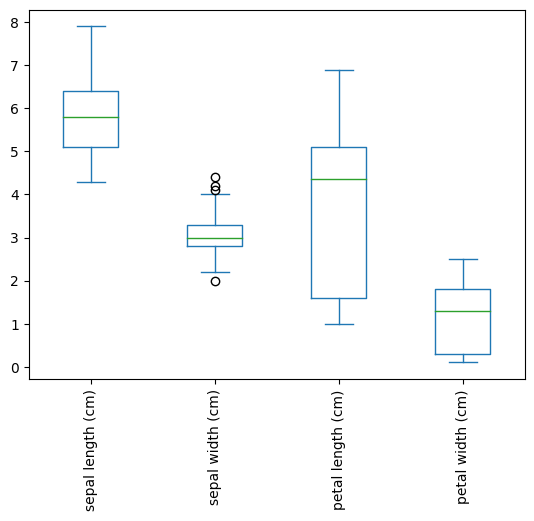

In [66]:
df_iris.plot.box(rot=90)

In [67]:
# Estandarizar los datos
scaler = StandardScaler()
df_iris_std = scaler.fit_transform(df_iris)

# Aplicar PCA al conjunto de datos estandarizado
pca_iris = PCA(n_components=4)
pca_iris_result = pca_iris.fit_transform(df_iris_std)

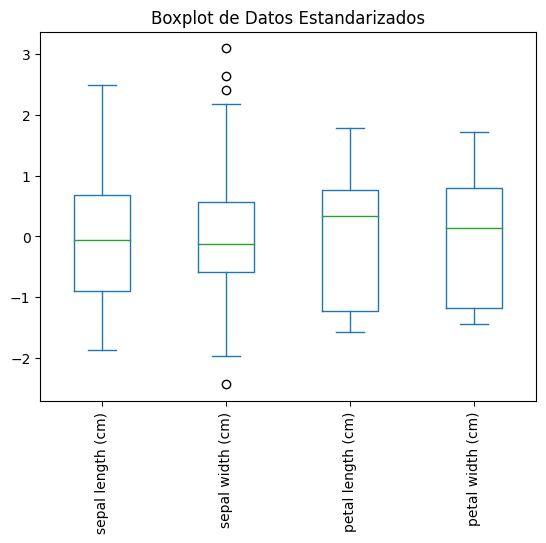

In [68]:
# Mostrar boxplot de los datos estandarizados
df_iris_std_boxplot = pd.DataFrame(df_iris_std, columns=iris.feature_names)
df_iris_std_boxplot.plot.box(rot=90)
plt.title('Boxplot de Datos Estandarizados')
plt.show()

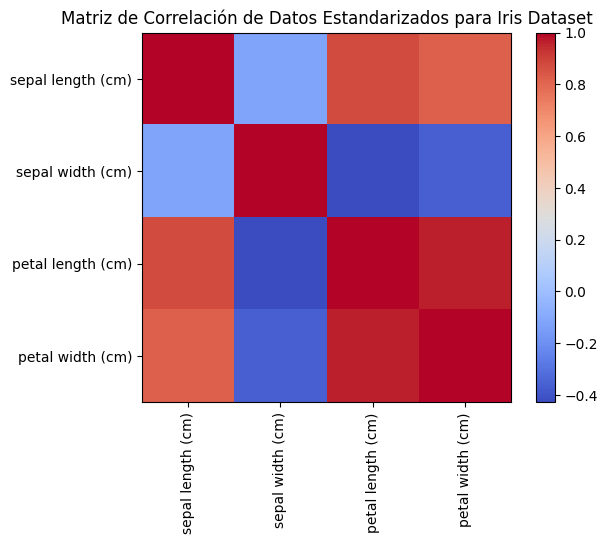

In [69]:
# Calcular la matriz de correlación de los datos estandarizados
correlation_matrix = pd.DataFrame(
    df_iris_std, columns=iris.feature_names).corr()

# Mostrar la matriz de correlación
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(iris.feature_names)), iris.feature_names, rotation=90)
plt.yticks(range(len(iris.feature_names)), iris.feature_names)
plt.title('Matriz de Correlación de Datos Estandarizados para Iris Dataset')
plt.show()

In [70]:
# Mostrar la tabla de correlación
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [71]:
# Mostrar los componentes principales
pca_iris.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [72]:
# Proporción de varianza explicada por cada componente
explained_var_ratio = pca_iris.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

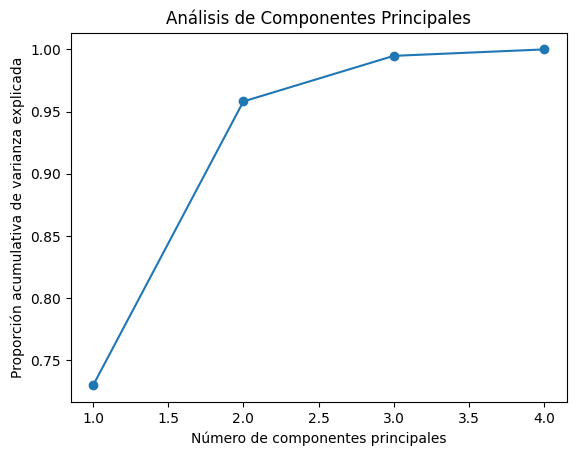

In [73]:
# Visualizar la proporción acumulativa de varianza explicada
plt.plot(range(1, len(cumulative_var_ratio) + 1),
         cumulative_var_ratio, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción acumulativa de varianza explicada')
plt.title('Análisis de Componentes Principales')
plt.show()

In [74]:
# Seleccionar el número de componentes principales
num_components = 2
pca_iris_selected = PCA(n_components=num_components)
df_iris_pca = pca_iris_selected.fit_transform(df_iris_std)

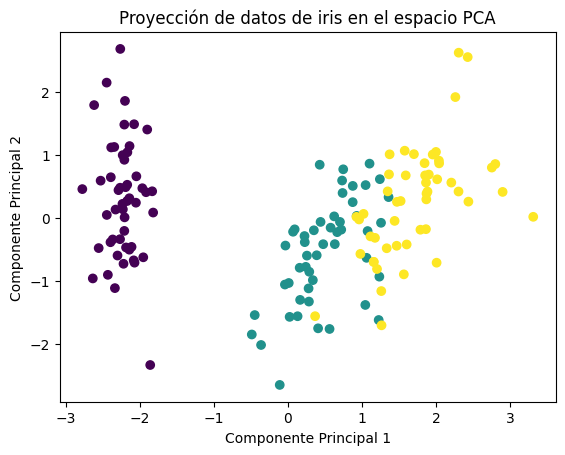

In [75]:
# Visualizar los datos transformados en el nuevo espacio de características
plt.scatter(df_iris_pca[:, 0], df_iris_pca[:, 1],
            c=iris.target, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de datos de iris en el espacio PCA')
plt.show()

# <font color="red"> Práctica [índice de calidad de vida]</font>

En esta práctica explorarás un conjunto de datos en el que se han registrado diversos los valores de índices relacionados con la calidad de vida para diferentes paísses. Los datos están disponibles en el archivo ```quality_life_2020.csv```.

La fuente de los datos es:   

https://www.kaggle.com/datasets/dumbgeek/countries-dataset-2020?select=Quality+of+life+index+by+countries+2020.csv

**Instrucciones**

1. Explora los datos.
2. Estandariza las variables.
3. Aplica la técnica de PCA para reducir la dimensionalidad. Elige el total de componentes de manera que en los datos transformados se preserve, por lo menos, el $75\%$ de la varianza original.
4. Utiliza los datos transformados para segmentar a los países de acuerdo al índice de calidad de vida.
5. Describe los segmentos identificados en el paso anterior.
6. Construye una gráfica de dispersión utilizando las dos componentes principales del conjunto transformado. Colorea cada punto de acuerdo al segmento y etiqueta cada punto con el nombre del país correspondiente.


In [76]:
# Importar las librerias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [77]:
# 1. Explorar los datos
df_quality_life = pd.read_csv("./files/quality_life_2020.csv")
df_quality_life.head()

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80
1,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24
2,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87
3,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
4,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61


<AxesSubplot: >

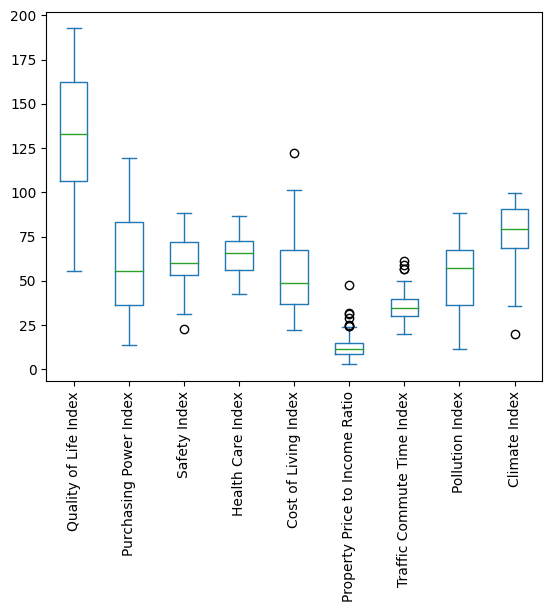

In [78]:
# Datos sin estandarizar
df_quality_life.plot.box(rot=90)

In [79]:
# 2. Estandarizar las variables
features = df_quality_life.columns[1:]
scaler = StandardScaler()
df_quality_life_std = scaler.fit_transform(df_quality_life[features])

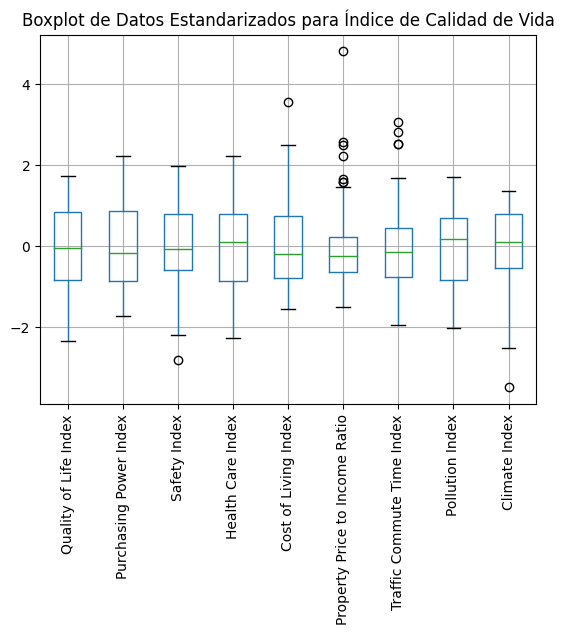

In [80]:
# Mostrar boxplot de los datos estandarizados
df_quality_life_std_boxplot = pd.DataFrame(
    df_quality_life_std, columns=features)
df_quality_life_std_boxplot.boxplot(rot=90)
plt.title('Boxplot de Datos Estandarizados para Índice de Calidad de Vida')
plt.show()

In [81]:
# 3. Aplicar la técnica de PCA
pca_quality_life = PCA()
df_quality_life_pca = pca_quality_life.fit_transform(df_quality_life_std)

# Imprimir los primeros 5 registros de los datos transformados
print("Datos transformados con PCA:")
print(pd.DataFrame(df_quality_life_pca, columns=[
      f"PC{i+1}" for i in range(df_quality_life_pca.shape[1])]).head())

Datos transformados con PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.815924 -0.673164  0.002519 -0.196698 -0.154464  0.078668 -0.200362   
1 -4.600216 -0.808150  0.431466 -0.600700  1.786094  0.637097 -0.075394   
2 -3.604566  0.515085  0.626919 -0.439140 -0.245216 -0.843174 -0.431121   
3 -2.915132 -1.313482 -0.805125 -0.875960 -0.103091 -0.147375 -0.263968   
4 -3.001710 -0.570807 -0.430167  0.120626 -0.088557  0.132052 -0.272944   

        PC8       PC9  
0  0.082133 -0.000052  
1  0.471563  0.000080  
2 -0.059643 -0.000063  
3 -0.531684 -0.000152  
4 -0.032208 -0.000023  


In [82]:
# 4. Seleccionar el número de componentes para preservar al menos el 75% de la varianza
variance_ratio_cumulative = np.cumsum(
    pca_quality_life.explained_variance_ratio_)
num_components_to_preserve = np.argmax(variance_ratio_cumulative >= 0.75) + 1

In [83]:
variance_ratio_cumulative

array([0.53006482, 0.66624643, 0.78678195, 0.87137643, 0.91833061,
       0.9558094 , 0.9834774 , 1.        , 1.        ])

In [84]:
num_components_to_preserve

3

In [85]:
print(df_quality_life.columns)

Index(['Country', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Health Care Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index'],
      dtype='object')


In [86]:
# 5. Segmentar países de acuerdo al índice de calidad de vida
from sklearn.cluster import KMeans

# Supongamos que "Quality_of_life_index" es la columna que contiene el índice de calidad de vida
quality_of_life_index = df_quality_life["Quality of Life Index"].values.reshape(
    -1, 1)


# Elegir el número de clusters (puedes ajustar este valor según lo que consideres adecuado)
num_clusters = 3

# Aplicar k-medias
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_quality_life["Cluster"] = kmeans.fit_predict(quality_of_life_index)

# Imprimir estadísticas resumidas de cada cluster
cluster_stats = df_quality_life.groupby(
    "Cluster")["Quality of Life Index"].describe()
print(cluster_stats)

# Imprimir los países en cada cluster
for cluster_num in range(num_clusters):
    countries_in_cluster = df_quality_life[df_quality_life["Cluster"]
                                           == cluster_num]["Country"].tolist()
    print(f"Cluster {cluster_num + 1}: {countries_in_cluster}")

         count        mean        std     min       25%      50%       75%  \
Cluster                                                                      
0         26.0  131.465385  11.897367  115.31  120.2925  130.885  141.5625   
1         25.0   94.631200  15.031827   55.65   85.4600  101.880  105.6500   
2         29.0  170.487931  12.562699  152.53  159.4200  169.820  181.0200   

            max  
Cluster          
0        150.56  
1        112.40  
2        192.67  
Cluster 1: ['Saudi Arabia', 'Latvia', 'Israel', 'Cyprus', 'Singapore', 'Taiwan', 'Poland', 'Italy', 'South Korea', 'Belarus', 'Greece', 'Romania', 'South Africa', 'Bulgaria', 'Hungary', 'Turkey', 'Uruguay', 'Ecuador', 'Bosnia And Herzegovina', 'Chile', 'Mexico', 'Malaysia', 'Serbia', 'Georgia', 'Kuwait', 'Argentina']
Cluster 2: ['Jordan', 'North Macedonia', 'India', 'Panama', 'Lebanon', 'Colombia', 'Brazil', 'Morocco', 'Pakistan', 'Ukraine', 'China', 'Russia', 'Thailand', 'Hong Kong', 'Indonesia', 'Kazakhstan', 'V

C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


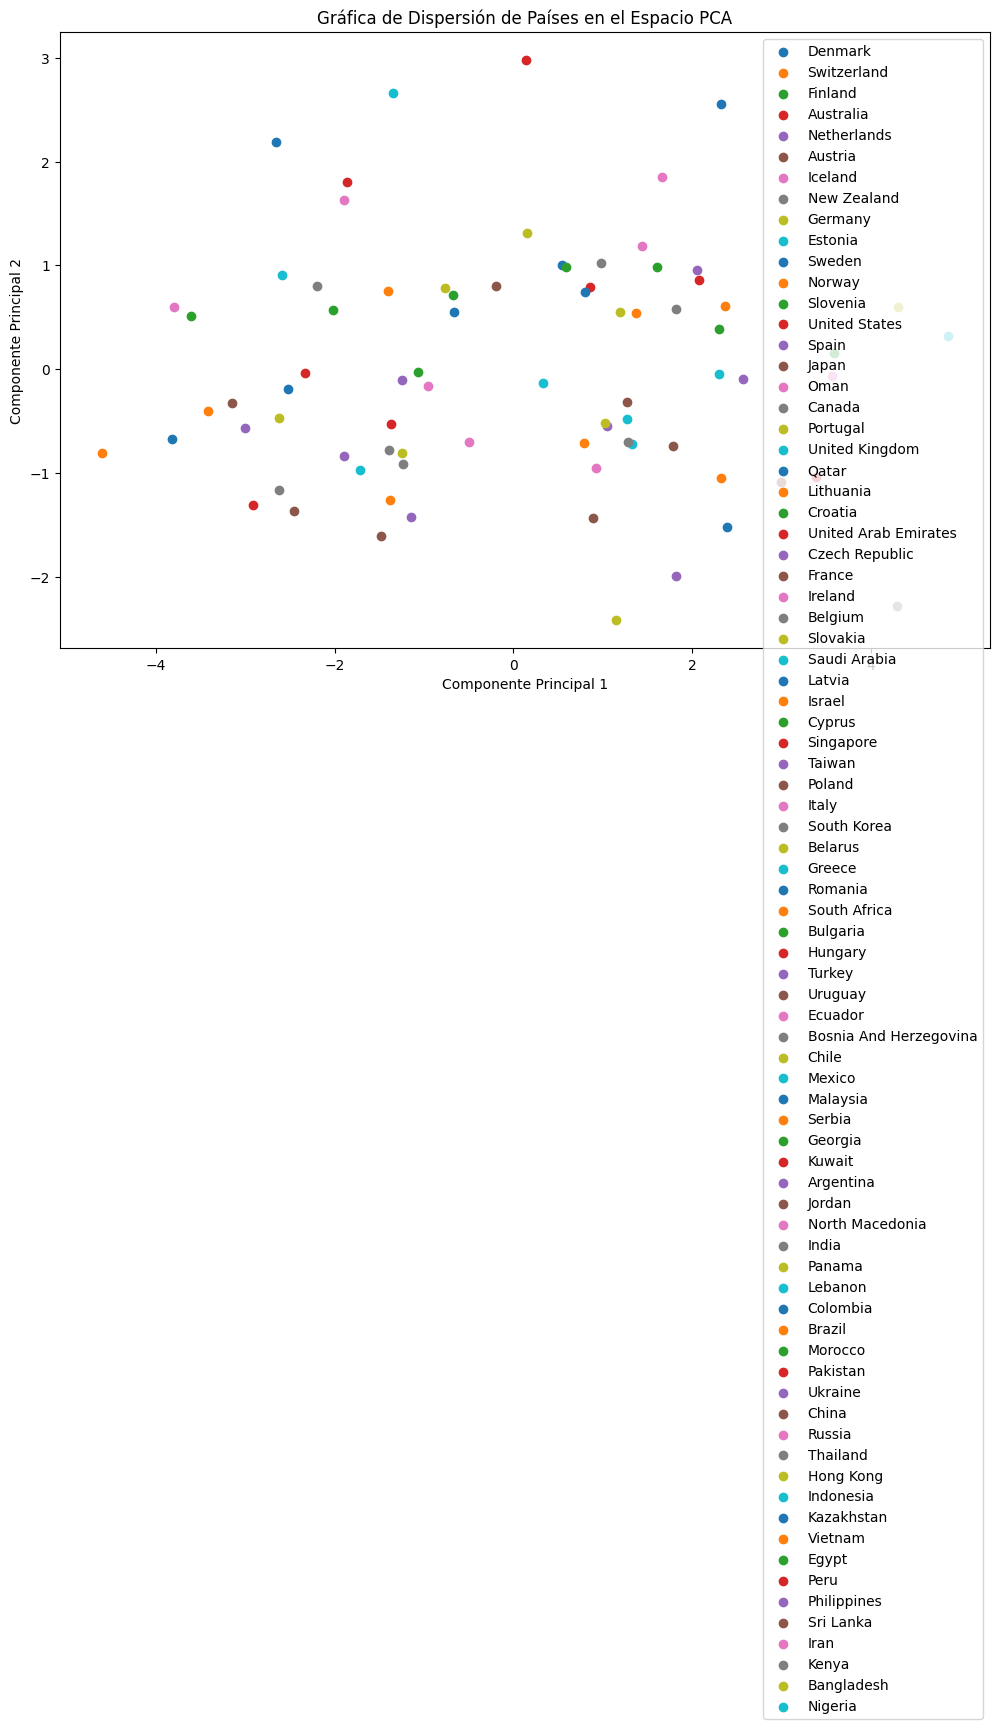

In [87]:
# 6. Construir una gráfica de dispersión utilizando los dos primeros componentes principales
plt.figure(figsize=(12, 8))
for i, country in enumerate(df_quality_life["Country"]):
    plt.scatter(df_quality_life_pca[i, 0],
                df_quality_life_pca[i, 1], label=country)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfica de Dispersión de Países en el Espacio PCA')
plt.legend()
plt.show()